In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create path

path = r'/Users/laceymarchment/Desktop/A6'

In [5]:
# Import dataset

df = pd.read_csv(os.path.join(path,'AB_NYC_2019.csv.zip'))

In [4]:
### 1. Superhosts:
# What makes a superhost?
# Where are more superhosts?
# Who are the top 10 superhosts?

### 2. Price:
# What are the features that affect price?
# Price and among different boroughs?
# Predict the listing price? (preliminary linear regression model)

### 3. Area:
# Which neighbourhood has the most reviews?
# Do features differ neighbourhood to neighbourhood?

## 3. Create a correlation matrix heatmap (colored).
## Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

#### Coeffiecients closer to 1 are more likely to correlate.

In [7]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


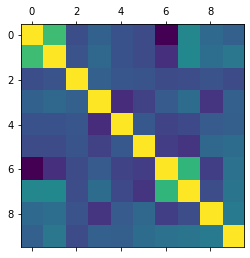

In [7]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

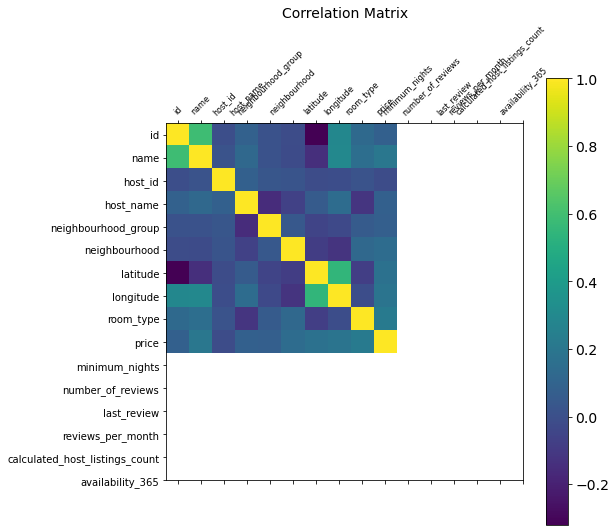

In [8]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [9]:
sub = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

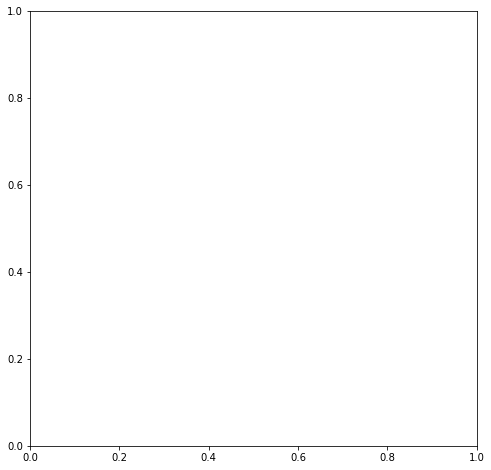

In [10]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.

f,ax = plt.subplots(figsize=(8,8))

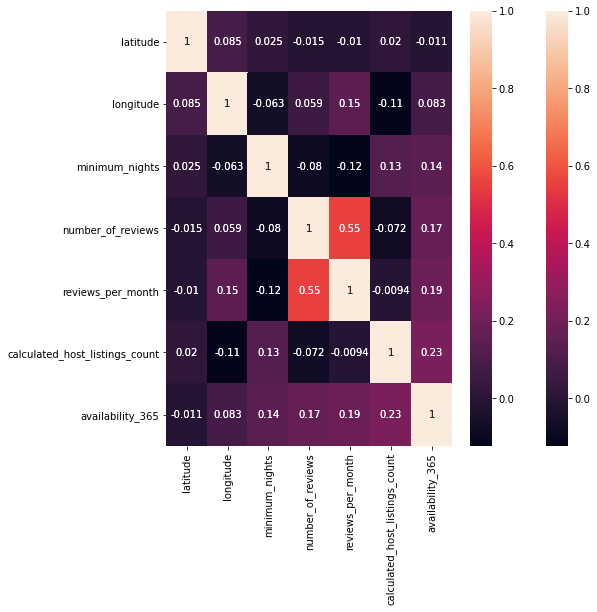

In [12]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

corr.figure

## 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
## Discuss the output in a markdown cell.

#### Correlation coefficient = 0.55 which means a strong positive correlation. 

Text(10.049999999999997, 0.5, 'Reviews per Month')

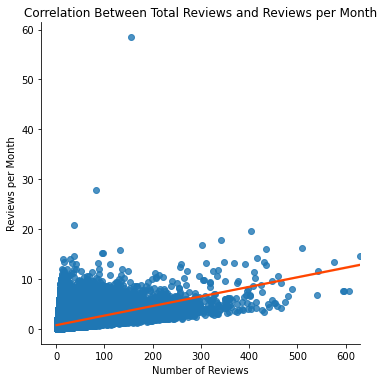

In [31]:
# Create a scatterplot for the "number_of_reviews" and "reviews_per_month" columns in seaborn

sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df, line_kws={'color': 'orangered'})
plt.title('Correlation Between Total Reviews and Reviews per Month', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=10)
plt.ylabel('Reviews per Month', fontsize=10)

## 5. Create a pair plot of the entire data set.
## Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

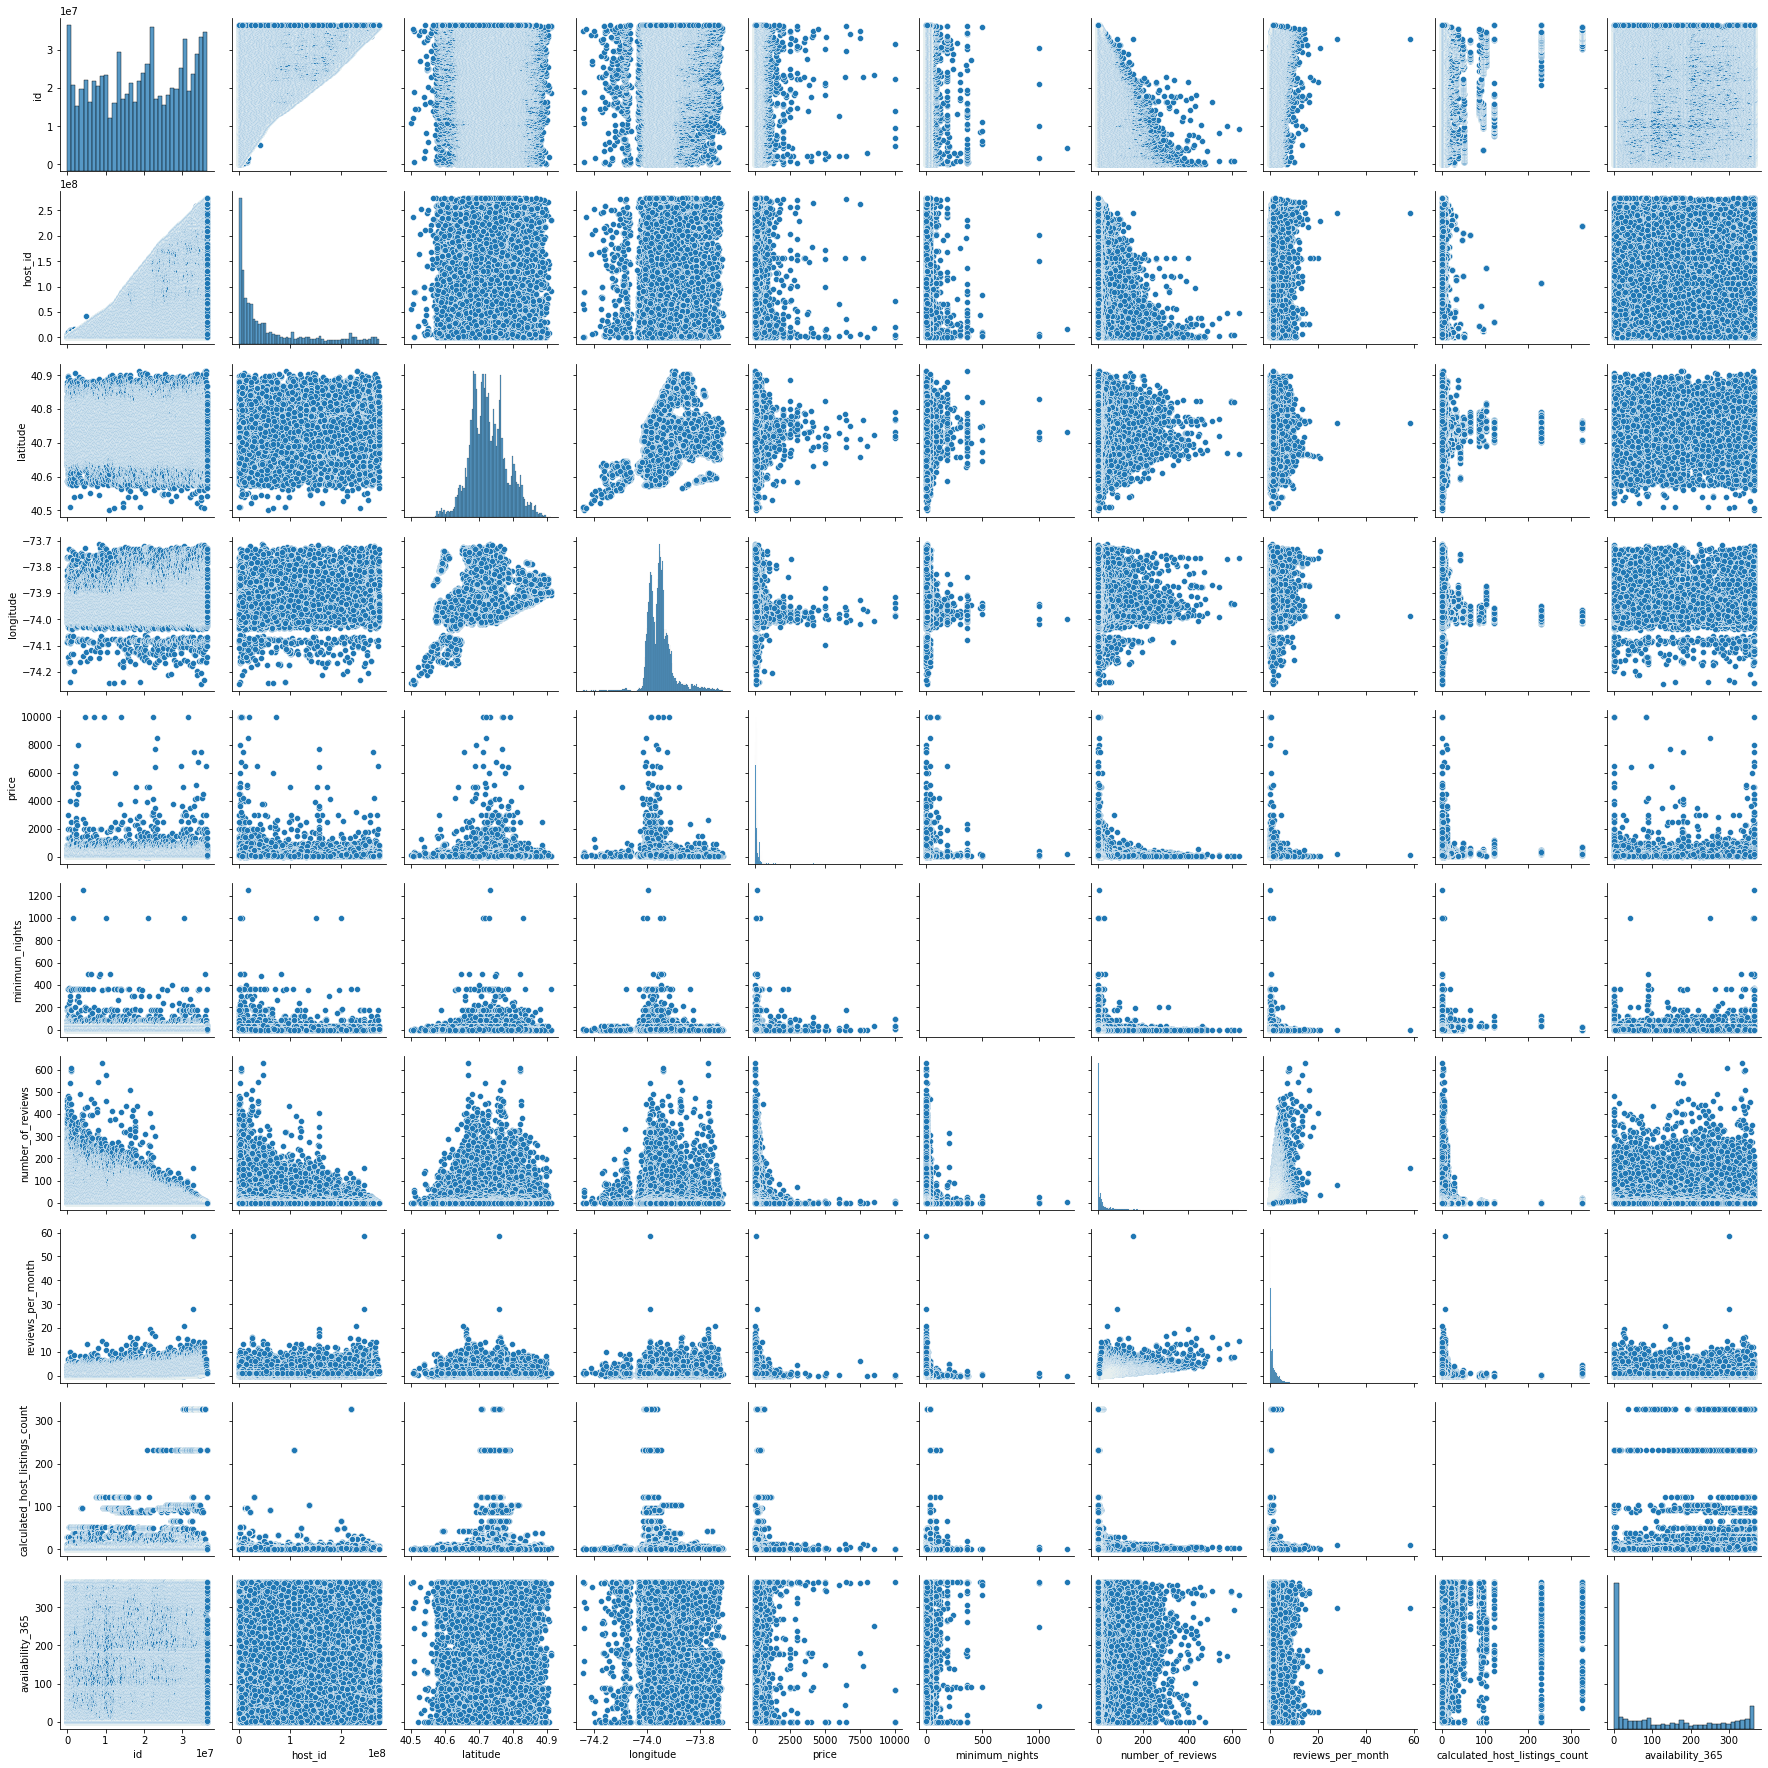

In [26]:
# Create a pair plot 

sns.pairplot(df)

## 6. Create a categorical plot and interpret the results.

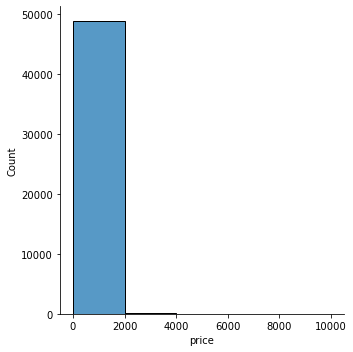

In [36]:
# Use a histogram to visualize the distribution of the variables. This way, you can determine sensible categories for the price ranges. You don't want to end up with too few observations in any one of the categories.

sns.displot(df['price'], bins = 5)

In [40]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [46]:
df.loc[df['price'] < 80, 'price_category'] = 'Low price'

In [50]:
df.loc[(df['price'] >= 80) & (df['price'] < 160), 'price_category'] = 'Middle price'

In [51]:
df.loc[df['price'] >= 160, 'price_category'] = 'High price'

In [52]:
df['price_category'].value_counts(dropna = False)

Middle price    18670
Low price       15826
High price      14399
Name: price_category, dtype: int64

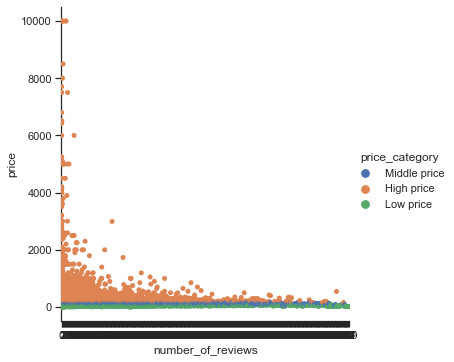

In [53]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
sns.catplot(x="number_of_reviews", y="price", hue="price_category", data=df)

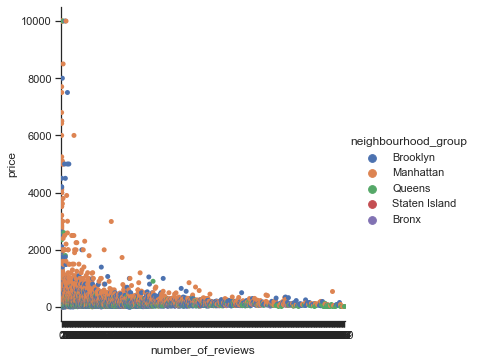

In [9]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
sns.catplot(x="reviews_per_month", y="price", hue="neighbourhood_group", data=df)

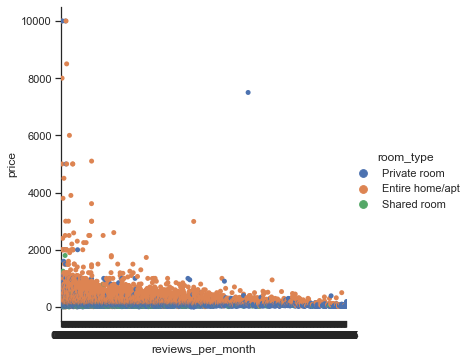

In [14]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
sns.catplot(x="reviews_per_month", y="price", hue="room_type", data=df)

## 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### 1. Highest Reviews_per_month:
#### less reviews the higher the price.
#### - Neighbourhood: Queens
#### - Room Type: Private Room


### 2. Highest Price:
#### - Neighbourhood: Manhatten and Brooklyn
#### - Room Type: Entire Apartment 

### 3. Lowest Availability:
#### - Neighbourhood: Brooklyn and Manhattan.
#### - Room Type: Private Room and Entire Room

Text(0, 0.5, 'Number of Listings')

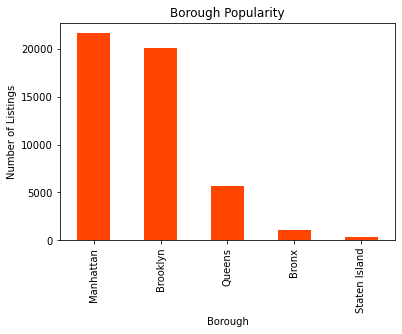

In [21]:
df['neighbourhood_group'].value_counts().plot.bar(color = 'orangered')
plt.title('Borough Popularity', fontsize=12)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Number of Listings', fontsize=10)

Text(0, 0.5, 'Reviews per Month')

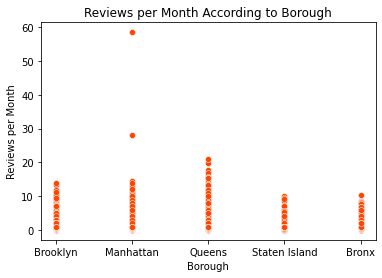

In [32]:
sns.scatterplot(x = 'neighbourhood_group', y = 'reviews_per_month', data = df, color = 'orangered')
plt.title('Reviews per Month According to Borough', fontsize=12)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Reviews per Month', fontsize=10)

Text(0, 0.5, 'Room Type')

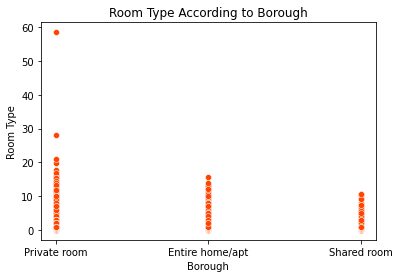

In [33]:
sns.scatterplot(x = 'room_type', y = 'reviews_per_month', data = df, color = 'orangered')
plt.title('Room Type According to Borough', fontsize=12)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Room Type', fontsize=10)

Text(0, 0.5, 'Availability')

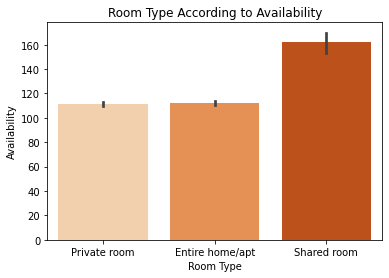

In [40]:
sns.barplot(x = 'room_type', y = 'availability_365', data = df, palette = 'Oranges')
plt.title('Room Type According to Availability', fontsize=12)
plt.xlabel('Room Type', fontsize=10)
plt.ylabel('Availability', fontsize=10)

Text(0, 0.5, 'Availability')

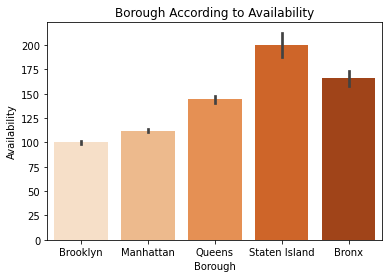

In [41]:
sns.barplot(x = 'neighbourhood_group', y = 'availability_365', data = df, palette = 'Oranges')
plt.title('Borough According to Availability', fontsize=12)
plt.xlabel('Borough', fontsize=10)
plt.ylabel('Availability', fontsize=10)

## 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

#### Hypothesis 1: Most reviews per month is most bookings.
#### Hypothesis 2: Manhattan is most expensive neighbourhood.
#### Hypothesis 3: Brooklyn is most popular neighbourhood. 

/Users/laceymarchment/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


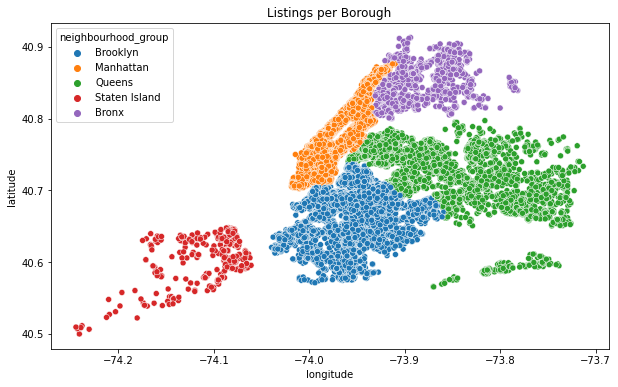

In [42]:
#

plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude , hue = df.neighbourhood_group)
plt.title('Listings per Borough', fontsize=12)
plt.ioff()

<AxesSubplot:ylabel='neighbourhood_group'>

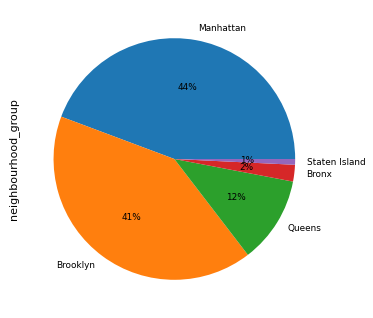

In [47]:
#

fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=8)

<AxesSubplot:ylabel='room_type'>

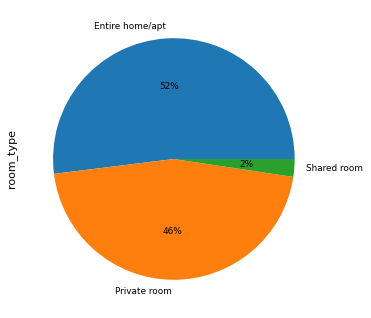

In [48]:
#

fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=8)

<AxesSubplot:title={'center':'Number of listings in each neighbourhood group'}, xlabel='neighbourhood_group', ylabel='calculated_host_listings_count'>

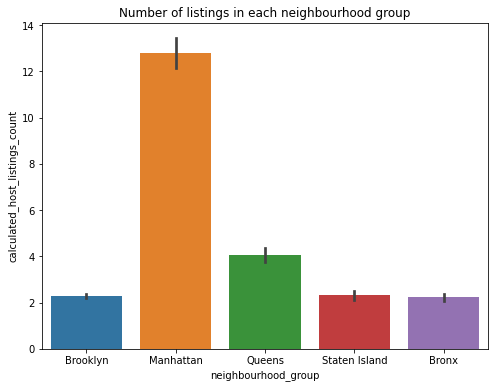

In [11]:
#

plt.figure(figsize=(8,6))
plt.title('Number of listings in each neighbourhood group')
sns.barplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count', data = df)

<AxesSubplot:title={'center':'Top 10 Neighbourhoods'}, xlabel='count', ylabel='neighbourhood'>

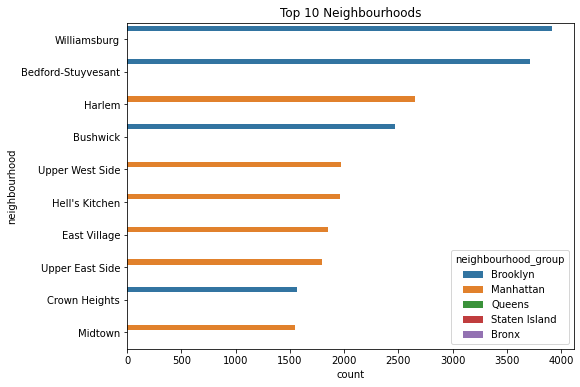

In [50]:
#

plt.figure(figsize=(8,6))
plt.title('Top 10 Neighbourhoods', fontsize=12)
plt.xlabel('Listings', fontsize=10)
plt.ylabel('Neighbourhood', fontsize=10)
sns.countplot(y = df['neighbourhood'], order=df['neighbourhood'].value_counts().index[:10], 
              hue=df['neighbourhood_group'])

<AxesSubplot:title={'center':'Price By Neighbourhood (without outliers)'}, xlabel='neighbourhood_group', ylabel='price'>

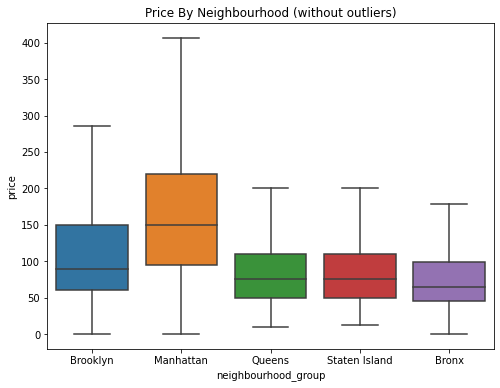

In [52]:
# Do not show the outliers

plt.figure(figsize=(8,6))
plt.title('Price By Neighbourhood (without outliers)')
plt.xlabel('Borough')
sns.boxplot(data=df, x='neighbourhood_group', y='price', showfliers=False)

/Users/laceymarchment/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Room Type Across NYC'}, xlabel='longitude', ylabel='latitude'>

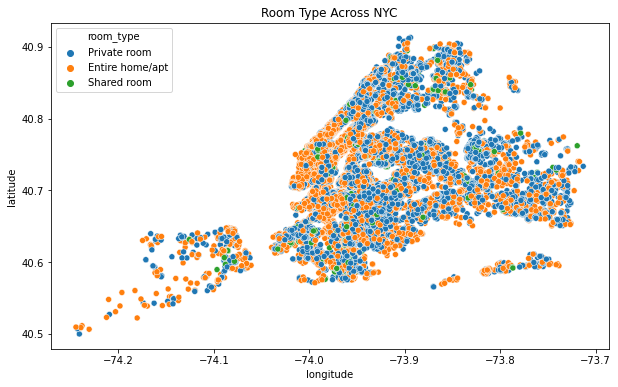

In [54]:
#

plt.figure(figsize=(10,6))
plt.title('Room Type Across NYC')
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)

Text(0, 0.5, 'Frequency')

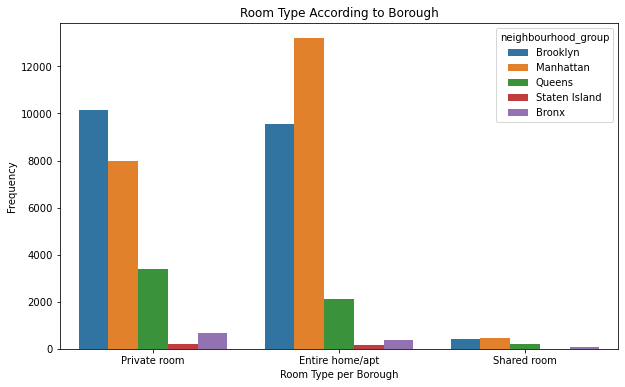

In [55]:
#

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')
plt.title('Room Type According to Borough')
plt.xlabel('Room Type per Borough')
plt.ylabel('Frequency')

Text(0, 0.5, 'Availabilty')

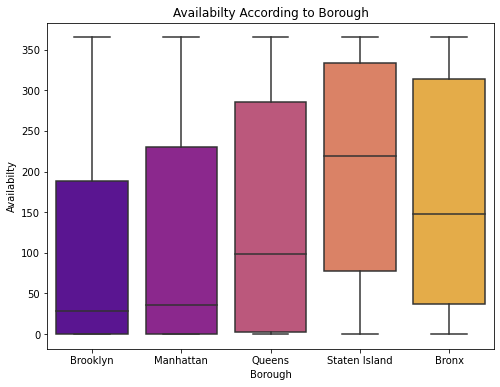

In [59]:
#

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='plasma')
plt.title('Availabilty According to Borough')
plt.xlabel('Borough')
plt.ylabel('Availabilty')

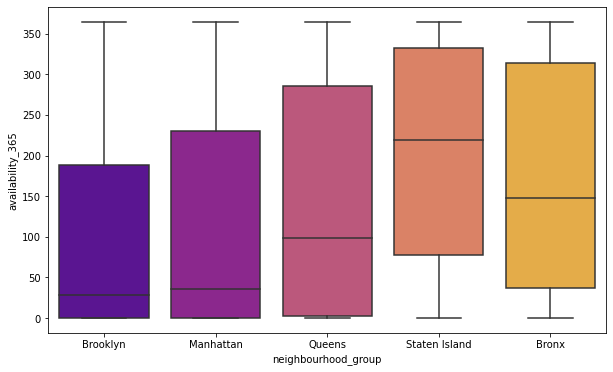

In [18]:
#

plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.title('Availabilty According to Borough')
plt.xlabel('Borough')
plt.ylabel('Availabilty')

In [19]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


TypeError: sequence item 2854: expected str instance, float found

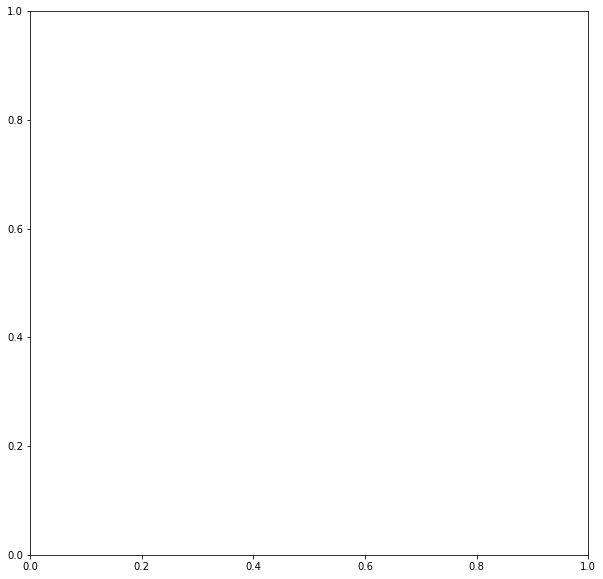

In [28]:
#



plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(df.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
#

df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

In [33]:
#

def top_listings

for i in range(1,11):
  print("Number Of Reviews: ",i)
  print("Amount Of No.Reviews:",len(df[df['number_of_reviews'] == i]))

Number Of Reviews:  1
Amount Of No.Reviews: 5244
Number Of Reviews:  2
Amount Of No.Reviews: 3465
Number Of Reviews:  3
Amount Of No.Reviews: 2520
Number Of Reviews:  4
Amount Of No.Reviews: 1994
Number Of Reviews:  5
Amount Of No.Reviews: 1618
Number Of Reviews:  6
Amount Of No.Reviews: 1357
Number Of Reviews:  7
Amount Of No.Reviews: 1179
Number Of Reviews:  8
Amount Of No.Reviews: 1127
Number Of Reviews:  9
Amount Of No.Reviews: 964
Number Of Reviews:  10
Amount Of No.Reviews: 803


Text(0, 0.5, 'Number of Reviews')

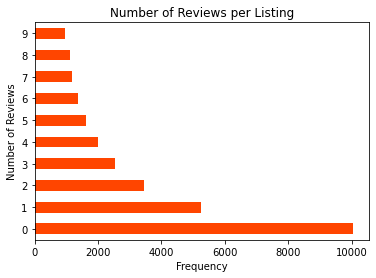

In [61]:
#

df['number_of_reviews'].value_counts().iloc[:10].plot(kind = 'barh', color ='orangered')
plt.title('Number of Reviews per Listing')
plt.xlabel('Frequency')
plt.ylabel('Number of Reviews')

In [36]:
#

def top_listings():
    for i in range(1,11):
        print("Number Of Listings: ",i)
        print("Amount Of No. Listings:",len(df[df['calculated_host_listings_count'] == i]))

In [38]:
top_listings()

Number Of Listings:  1
Amount Of No. Listings: 32303
Number Of Listings:  2
Amount Of No. Listings: 6658
Number Of Listings:  3
Amount Of No. Listings: 2853
Number Of Listings:  4
Amount Of No. Listings: 1440
Number Of Listings:  5
Amount Of No. Listings: 845
Number Of Listings:  6
Amount Of No. Listings: 570
Number Of Listings:  7
Amount Of No. Listings: 399
Number Of Listings:  8
Amount Of No. Listings: 416
Number Of Listings:  9
Amount Of No. Listings: 234
Number Of Listings:  10
Amount Of No. Listings: 210
